In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [4]:
from google.colab import files

# Upload the file
uploaded = files.upload()

# Read the CSV file
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)
df.head()

Saving insurance.csv to insurance.csv


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm

In [6]:
print("Total Rows:", df.shape[0])
print("Total Columns:", df.shape[1])

# Check data types and non-null counts
df.info()

# Check summary statistics for numeric columns
df.describe()

Total Rows: 1338
Total Columns: 7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isnull().sum().sort_values(ascending=False)

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [8]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)
    print(f"Filled missing values in {col} with median: {median_val}")


Filled missing values in age with median: 39.0
Filled missing values in bmi with median: 30.4
Filled missing values in children with median: 1.0
Filled missing values in charges with median: 9382.033


/tmp/ipython-input-3795182658.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


In [9]:
print(pd.DataFrame(df.isnull().sum().sort_values(ascending=False)))

          0
age       0
sex       0
bmi       0
children  0
smoker    0
region    0
charges   0


In [14]:
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)


In [11]:
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
baseline_model = RandomForestRegressor(random_state=42)
baseline_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
y_pred_baseline = baseline_model.predict(X_test)


In [16]:
r2_baseline = r2_score(y_test, y_pred_baseline)
mae_baseline = mean_absolute_error(y_test, y_pred_baseline)
rmse_baseline = np.sqrt(mean_squared_error(y_test, y_pred_baseline))


In [17]:
print(f"R² Score: {r2_baseline:.4f}")
print(f"MAE: {mae_baseline:.4f}")
print(f"RMSE: {rmse_baseline:.4f}")

R² Score: 0.8651
MAE: 2550.0785
RMSE: 4576.2999


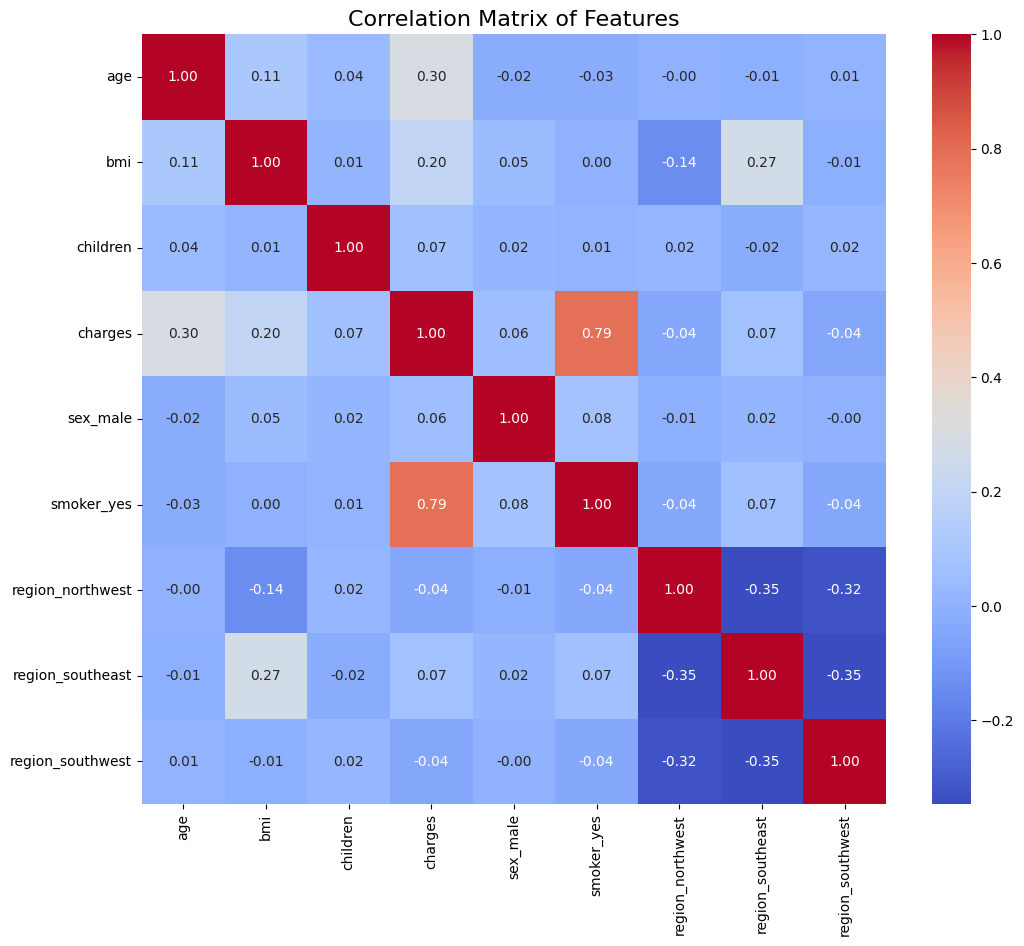

In [19]:
from matplotlib import pyplot as plt
import seaborn as sns
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features', fontsize=16)
plt.show()


In [21]:
print("Correlations with Charges:")
print(correlation_matrix['charges'].sort_values(ascending=False))


Correlations with Charges:
charges             1.000000
smoker_yes          0.787251
age                 0.299008
bmi                 0.198341
region_southeast    0.073982
children            0.067998
sex_male            0.057292
region_northwest   -0.039905
region_southwest   -0.043210
Name: charges, dtype: float64


In [22]:
important_features = ['age', 'bmi', 'children', 'smoker_yes', 'sex_male', 'region_northwest', 'region_southeast', 'region_southwest']

In [23]:
X_selected = df_encoded[important_features]
y_selected = df_encoded['charges']

In [24]:
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    X_selected, y_selected, test_size=0.2, random_state=42
)


In [25]:
final_model = RandomForestRegressor(random_state=42)
final_model.fit(X_train_selected, y_train_selected)


RandomForestRegressor(random_state=42)

In [26]:
y_pred_final = final_model.predict(X_test_selected)


In [27]:
r2_final = r2_score(y_test_selected, y_pred_final)
mae_final = mean_absolute_error(y_test_selected, y_pred_final)
rmse_final = np.sqrt(mean_squared_error(y_test_selected, y_pred_final))


In [28]:
print(f"R² Score: {r2_final:.4f}")
print(f"MAE: {mae_final:.4f}")
print(f"RMSE: {rmse_final:.4f}")

R² Score: 0.8652
MAE: 2549.3377
RMSE: 4575.1982


In [29]:
summary_data = {
    'Model': ['Baseline Model', 'Final Model'],
    'R² Score': [r2_baseline, r2_final],
    'MAE': [mae_baseline, mae_final],
    'RMSE': [rmse_baseline, rmse_final]
}

In [31]:
summary_df = pd.DataFrame(summary_data)
print(" Model Performance Summary (Before vs. After) ")
print(summary_df)


 Model Performance Summary (Before vs. After) 
            Model  R² Score          MAE         RMSE
0  Baseline Model  0.865103  2550.078471  4576.299916
1     Final Model  0.865168  2549.337730  4575.198223
